In [1]:
import pandas as pd
import numpy as np

In [2]:
headphone_electronics = pd.read_pickle('merged_df.pkl')
headphone_electronics

,overall,reviewTime,reviewerID,asin,style,reviewerName,reviewText,style_json,brand
0,5.0,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,{'Color:': ' Blue W/Mic'},George Walker,great headphones cord short,"{""Color:"": "" Blue W/Mic""}",HeadGear
1,5.0,"05 8, 2017",A299MRB9O6GWDE,4126895493,{'Color:': ' Blue Zebra W/Mic'},Carolyn B,really like headphone wanted something office ...,"{""Color:"": "" Blue Zebra W/Mic""}",HeadGear
2,1.0,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,{'Color:': ' Blue W/Mic'},MK,wire headphone break less month dont buy,"{""Color:"": "" Blue W/Mic""}",HeadGear
3,3.0,"09 24, 2016",A36BC0YFDBNB5X,4126895493,{'Color:': ' Green'},bigboy,good,"{""Color:"": "" Green""}",HeadGear
4,1.0,"07 17, 2016",A212PQ0HQPNNWM,4126895493,{'Color:': ' Violet Purple'},Kelly Hales,currently return product sound doesnt come spe...,"{""Color:"": "" Violet Purple""}",HeadGear
...,...,...,...,...,...,...,...,...,...
625426,5.0,"04 10, 2017",A23BQ4GZNFBLET,B01HI9GG30,nan,John,love aux cord genius finally use spring trick ...,NaN,Beautiful-tech
625427,3.0,"02 11, 2017",A205H5OQKYCPSH,B01HI9GG30,nan,Apex,get crackle pop occasionally,NaN,Beautiful-tech
625428,5.0,"01 17, 2017",AIW5NLEN5V40Y,B01HI9GG30,nan,ray sooley,great cable need right angle brookstone ampspe...,NaN,Beautiful-tech
625429,5.0,"10 8, 2016",A39UA7Q4FLM0DL,B01HI9GG30,nan,binkisoto799,work perfect purchase husband car hook phone v...,NaN,Beautiful-tech


In [16]:
selected_columns = ['reviewerID', 'asin', 'overall']
collab_df = headphone_electronics[selected_columns].head(100)
collab_df

,reviewerID,asin,overall
0,A38RQFVQ1AKJQQ,4126895493,5.0
1,A299MRB9O6GWDE,4126895493,5.0
2,A3ACFC6DQQLIQT,4126895493,1.0
3,A36BC0YFDBNB5X,4126895493,3.0
4,A212PQ0HQPNNWM,4126895493,1.0
...,...,...,...
95,A29FYIZFZ1ILZZ,B000001OMI,1.0
96,A1CM83OHE53Z5W,B000001OMI,1.0
97,ALHWZSTAELK9I,B000001OMI,4.0
98,A38S0MGL8QE0CM,B000001OMI,4.0


#Create a user-item rating matrix

In [17]:
from surprise import Dataset, Reader

# Define the rating scale
reader = Reader(rating_scale=(1, 5))

# Load the DataFrame into a surprise Dataset
data = Dataset.load_from_df(collab_df[['reviewerID', 'asin', 'overall']], reader)

# Build the user-item rating matrix
trainset = data.build_full_trainset()

# Extract the user-item rating matrix
user_item_matrix = trainset.build_testset()

# Print the user-item rating matrix (optional)
#for (uid, iid, rating) in user_item_matrix:
    #print("User:", uid, "- Item:", iid, "- Rating:", rating)
#user_item_matrix

In [18]:
user_item_data = []

for (uid, iid, rating) in user_item_matrix:
    user_item_data.append({'reviewerid': uid,
                           'asin': iid,
                           'overall': rating})

# Convert the list of dictionaries into a DataFrame
user_item_df = pd.DataFrame(user_item_data)

# Print the DataFrame
print(user_item_df)

        reviewerid        asin  overall
0   A38RQFVQ1AKJQQ  4126895493      5.0
1   A299MRB9O6GWDE  4126895493      5.0
2   A3ACFC6DQQLIQT  4126895493      1.0
3   A36BC0YFDBNB5X  4126895493      3.0
4   A212PQ0HQPNNWM  4126895493      1.0
..             ...         ...      ...
95  A29FYIZFZ1ILZZ  B000001OMI      1.0
96  A1CM83OHE53Z5W  B000001OMI      1.0
97   ALHWZSTAELK9I  B000001OMI      4.0
98  A38S0MGL8QE0CM  B000001OMI      4.0
99  A37NP1T8KCEMOW  B000001OMI      4.0

[100 rows x 3 columns]


In [19]:
user_item_mat= pd.pivot_table(user_item_df, values='overall', index='reviewerid', columns='asin', fill_value=0.0)

user_item_mat

asin,4126895493,B000001OM8,B000001OMI
reviewerid,,,
A1010IB6ZI4YWK,1.0,0.0,0.0
A130H624EX3T4N,3.0,0.0,0.0
A143RNRZVBYC9K,3.0,0.0,0.0
A15U5NUS1EY7IQ,0.0,0.0,5.0
A161PL8M5W22QL,0.0,0.0,5.0
...,...,...,...
ARJDGQ1C1Z1FT,4.0,0.0,0.0
ARSHTDC6VWNN0,0.0,0.0,5.0
AS27K6R1MGMDY,5.0,0.0,0.0


#Normalize the ratings, by using min-max scaling on user’s reviews

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

user_item_mat_normalized = scaler.fit_transform(user_item_mat)

user_item_normal= pd.DataFrame(user_item_mat_normalized, index=user_item_mat.index, columns=user_item_mat.columns)

user_item_normal

asin,4126895493,B000001OM8,B000001OMI
reviewerid,,,
A1010IB6ZI4YWK,0.2,0.0,0.0
A130H624EX3T4N,0.6,0.0,0.0
A143RNRZVBYC9K,0.6,0.0,0.0
A15U5NUS1EY7IQ,0.0,0.0,1.0
A161PL8M5W22QL,0.0,0.0,1.0
...,...,...,...
ARJDGQ1C1Z1FT,0.8,0.0,0.0
ARSHTDC6VWNN0,0.0,0.0,1.0
AS27K6R1MGMDY,1.0,0.0,0.0


User-User Recommder System

In [21]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    
    if norm_vec1 == 0 or norm_vec2 == 0:
        return 0  # To avoid division by zero
    
    return dot_product / (norm_vec1 * norm_vec2)

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix between users
cosine_sim = cosine_similarity(user_item_normal)

# Function to find top N similar users for each user
def top_similar_users(user_id, N):
    user_similarity = cosine_sim[user_id]  # Cosine similarity of the given user with all other users
    similar_users = [(similarity, idx) for idx, similarity in enumerate(user_similarity) if idx != user_id]  # Exclude the user itself
    similar_users.sort(reverse=True)  # Sort in descending order of similarity
    return similar_users[:N]

Find top N similar users for each user

In [10]:
N_values = [10, 20, 30, 40, 50]

for user_id in range(2):
    reviewer_id = user_item_normal.index[user_id]  # Get the reviewerID of the user
    print(f"ReviewerID {reviewer_id}:")
    for N in N_values:
        top_similar = top_similar_users(user_id, N)
        print(f"  Top {N} similar users: {[user_item_normal.index[idx] for _, idx in top_similar]}")
        print("------------------------------------------------------------------------------------------------------")
    print("===========================================================================================================")

ReviewerID A1010IB6ZI4YWK:
  Top 10 similar users: ['AY88L1GAS7HN7', 'ATUL99V1C0U6X', 'AS27K6R1MGMDY', 'ARJDGQ1C1Z1FT', 'AMBX0TR9DL3JS', 'AID92BWEGPK99', 'AFTD9I043S1KP', 'AF8R1TOUWM3VO', 'AAZRAJZY9BLZV', 'A3RVZDHWG8CGEJ']
------------------------------------------------------------------------------------------------------
  Top 20 similar users: ['AY88L1GAS7HN7', 'ATUL99V1C0U6X', 'AS27K6R1MGMDY', 'ARJDGQ1C1Z1FT', 'AMBX0TR9DL3JS', 'AID92BWEGPK99', 'AFTD9I043S1KP', 'AF8R1TOUWM3VO', 'AAZRAJZY9BLZV', 'A3RVZDHWG8CGEJ', 'A3PCG3K2WYHFUE', 'A3NI5J2G7BNVS9', 'A3MCV7ORKJ7GQ2', 'A3IARFW5PBDOCT', 'A3HXPOYTN8B4SU', 'A3FCON8N6PJIZB', 'A3ACFC6DQQLIQT', 'A39VIFSCU077S1', 'A38RQFVQ1AKJQQ', 'A36BC0YFDBNB5X']
------------------------------------------------------------------------------------------------------
  Top 30 similar users: ['AY88L1GAS7HN7', 'ATUL99V1C0U6X', 'AS27K6R1MGMDY', 'ARJDGQ1C1Z1FT', 'AMBX0TR9DL3JS', 'AID92BWEGPK99', 'AFTD9I043S1KP', 'AF8R1TOUWM3VO', 'AAZRAJZY9BLZV', 'A3RVZDHWG8CGEJ',

Use K-folds validation. K = 5. Explanation: Create 5 subsets, and take 1 of them as the validation set. Take the rest 4 to be the training set.

In [22]:
#Using KNN
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import KNNBasic
import numpy as np

# Convert user_item_mat_normalized to a long format DataFrame
user_item_df_normalized = user_item_normal.stack().reset_index()
user_item_df_normalized.columns = ['reviewerid', 'asin', 'overall']

# Define the rating scale
reader = Reader(rating_scale=(1, 5))

# Load the DataFrame into a surprise DatasetAutoFolds
data = Dataset.load_from_df(user_item_df_normalized[['reviewerid', 'asin', 'overall']], reader)

# Use KNNBasic algorithm for user-user collaborative filtering
algo = KNNBasic(sim_options={'user_based': True})

# Perform 5-fold cross-validation
cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the cross-validation results
print("Cross-validation results:")
for metric, values in cv_results.items():
    print(f"{metric}: {np.mean(values)} (std: {np.std(values)})")

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8250  0.8501  0.8877  0.8664  0.8446  0.8548  0.0211  
MAE (testset)     0.7233  0.7600  0.8067  0.7933  0.7467  0.7660  0.0304  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Cross-validation results:
test_rmse: 0.8547635551275846 (std: 0.021117090053302125)
test_mae: 0.7659999999999999 (std: 0.030433899228035514)
fit_time: 0.0005540847778320312 (std: 8.897352054946828e-05)

In [23]:
#Using cosine similarity
def cosine_similarity_matrix(matrix):
    # Calculate dot product of matrix with its transpose
    dot_product = np.dot(matrix, matrix.T)
    
    # Calculate norms of each row
    norms = np.linalg.norm(matrix, axis=1)
    
    # Calculate similarity matrix
    similarity_matrix = dot_product / (norms[:, None] * norms[None, :])
    
    return similarity_matrix

# Convert user-item matrix to numpy array
user_item_matrix = user_item_normal.values

# Calculate cosine similarity matrix
user_similarity_matrix = cosine_similarity_matrix(user_item_matrix)


In [24]:
def get_k_nearest_neighbors(similarity_matrix, k):
    # Get indices of top k similar users for each user
    nearest_neighbors = np.argsort(-similarity_matrix, axis=1)[:, 1:k+1]
    
    return nearest_neighbors

# Calculate the 10 nearest neighbors for each user
k_neighbors = 10
nearest_neighbors = get_k_nearest_neighbors(user_similarity_matrix, k_neighbors)
nearest_neighbors

array([[63, 60, 59, 56, 55, 54, 52, 51, 65, 48],
       [63, 60, 59, 56, 55, 54, 52, 51, 65, 48],
       [63, 60, 59, 56, 55, 54, 52, 51, 65, 48],
       [80, 81, 82, 75, 77, 64, 71, 18, 21, 23],
       [80, 81, 82, 75, 77, 64, 71, 18, 21, 23],
       [80, 81, 82, 75, 77, 64, 71, 18, 21, 23],
       [63, 60, 59, 56, 55, 54, 52, 51, 65, 48],
       [63, 60, 59, 56, 55, 54, 52, 51, 65, 48],
       [10, 14, 83, 85, 79, 67, 69, 16, 17, 19],
       [63, 60, 59, 56, 55, 54, 52, 51, 65, 48],
       [10, 14, 83, 85, 79, 67, 69, 16, 17, 19],
       [80, 81, 82, 75, 77, 64, 71, 18, 21, 23],
       [63, 60, 59, 56, 55, 54, 52, 51, 65, 48],
       [63, 60, 59, 56, 55, 54, 52, 51, 65, 48],
       [10, 14, 83, 85, 79, 67, 69, 16, 17, 19],
       [63, 60, 59, 56, 55, 54, 52, 51, 65, 48],
       [10, 14, 83, 85, 79, 67, 69, 16, 17, 19],
       [10, 14, 83, 85, 79, 67, 69, 16, 17, 19],
       [80, 81, 82, 75, 77, 64, 71, 18, 21, 23],
       [10, 14, 83, 85, 79, 67, 69, 16, 17, 19],
       [63, 60, 59, 

In [25]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
train_data, val_data = train_test_split(user_item_df_normalized, test_size=0.2, random_state=42)

In [26]:
def predict_ratings(train_data, nearest_neighbors):
    # Initialize DataFrame to store predicted ratings
    predicted_ratings = train_data.copy()
    
    # Iterate over each user
    for user_index, neighbors in enumerate(nearest_neighbors):
        # Get the ratings of the nearest neighbors
        neighbor_ratings = train_data[train_data['reviewerid'].isin(neighbors)]
        
        # Calculate the average rating of the nearest neighbors for each item
        avg_ratings = neighbor_ratings.groupby('asin')['overall'].mean()
        
        # Iterate over each item rated by the user
        for _, row in train_data[train_data['reviewerid'] == user_index].iterrows():
            # If the item has no rating from the nearest neighbors, use the global average rating
            if row['asin'] not in avg_ratings.index:
                predicted_ratings.at[_, 'overall'] = train_data['overall'].mean()
            else:
                predicted_ratings.at[_, 'overall'] = avg_ratings[row['asin']]
    
    return predicted_ratings

# Predict ratings using nearest neighbors
predicted_ratings = predict_ratings(train_data, nearest_neighbors)

# Step 3: Create a user-item rating matrix from the validation set
val_matrix = val_data.pivot(index='reviewerid', columns='asin', values='overall').fillna(0)

# Step 4: Compare actual values to predicted values and calculate MAE
mae = np.abs(val_matrix - predicted_ratings.pivot(index='reviewerid', columns='asin', values='overall')).mean().mean()
mae


0.2498765432098765

Report the MAE (Mean Absolute Error) for taking K = 10, 20, 30, 40,
50 similar users.

In [27]:
from sklearn.model_selection import train_test_split
import numpy as np

# Define the values of K for similar users
K_values = [10, 20, 30, 40, 50]

# Initialize list to store MAE for each value of K
mae_values = {}

# Split data into training and validation sets
train_data, val_data = train_test_split(user_item_df_normalized, test_size=0.25, random_state=42)

# Iterate over each value of K
for K in K_values:
    # Calculate the K nearest neighbors for each user
    nearest_neighbors = get_k_nearest_neighbors(user_similarity_matrix, K)
    
    # Predict ratings using nearest neighbors
    predicted_ratings = predict_ratings(train_data, nearest_neighbors)

    # Create a user-item rating matrix from the validation set
    val_matrix = val_data.pivot(index='reviewerid', columns='asin', values='overall').fillna(0)

    # Compare actual values to predicted values and calculate MAE
    mae = np.abs(val_matrix - predicted_ratings.pivot(index='reviewerid', columns='asin', values='overall')).mean().mean()
    
    # Store the MAE for this value of K
    mae_values[K] = mae

# Report the MAE for each value of K
for K, mae in mae_values.items():
    print(f"MAE for K={K}: {mae}")


MAE for K=10: 0.23478991596638657
MAE for K=20: 0.23478991596638657
MAE for K=30: 0.23478991596638657
MAE for K=40: 0.23478991596638657
MAE for K=50: 0.23478991596638657


Item Item Recommender System

In [41]:
# Convert user-item matrix to numpy array
user_item_matrix_1 = user_item_df_normalized.pivot(index='reviewerid', columns='asin', values='overall').fillna(0).values

# Calculate cosine similarity matrix for items
item_similarity_matrix = cosine_similarity_matrix(user_item_matrix_1)
item_similarity_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [43]:
k_neighbors_items = 10
nearest_neighbors_item_item = get_k_nearest_neighbors(item_similarity_matrix, k_neighbors_items)
nearest_neighbors_item_item

array([[980,  34,  50, ..., 842, 865, 808],
       [564, 311, 309, ..., 297, 579, 522],
       [975,   2, 969, ..., 931, 871, 887],
       ...,
       [101, 113,  11, ..., 937, 983, 982],
       [975,   2, 969, ..., 931, 871, 887],
       [ 37,  38,  46, ..., 883, 893, 841]])

In [47]:
from sklearn.model_selection import train_test_split
import numpy as np

# Define the values of K for similar items
K_values = [10, 20, 30, 40, 50]

# Initialize list to store MAE for each value of K
mae_values_item = {}

# Split data into training and validation sets
train_data, val_data = train_test_split(user_item_df_normalized, test_size=0.23, random_state=42)

# Calculate user-item matrix from training data
user_item_matrix_train = train_data.pivot(index='reviewerid', columns='asin', values='overall').fillna(0)

# Calculate cosine similarity matrix for items
item_similarity_matrix = cosine_similarity_matrix(user_item_matrix_train.T.values)

# Iterate over each value of K
for K in K_values:
    # Calculate the K nearest neighbors for each item
    nearest_neighbors = get_k_nearest_neighbors(item_similarity_matrix, K)
    
    # Predict ratings using nearest neighbors
    predicted_ratings = predict_ratings(train_data, nearest_neighbors)

    # Create a user-item rating matrix from the validation set
    val_matrix = val_data.pivot(index='reviewerid', columns='asin', values='overall').fillna(0)

    # Compare actual values to predicted values and calculate MAE
    mae = np.abs(val_matrix - predicted_ratings.pivot(index='reviewerid', columns='asin', values='overall')).mean().mean()
    
    # Store the MAE for this value of K
    mae_values_item[K] = mae

# Report the MAE for each value of K
for K, mae in mae_values_item.items():
    print(f"MAE for K={K}: {mae}")


MAE for K=10: 0.027099005400261666
MAE for K=20: 0.027099005400261666
MAE for K=30: 0.027099005400261666
MAE for K=40: 0.027099005400261666
MAE for K=50: 0.027099005400261666


Plot separate graphs for each of the two recommender systems, plotting
MAE against K

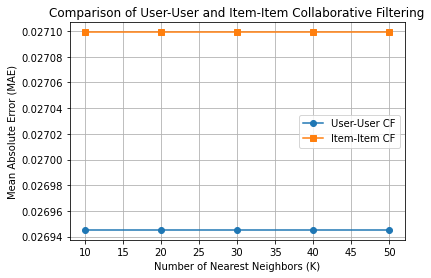

In [48]:
import matplotlib.pyplot as plt

# Values of K for similar users
K_values_user = list(mae_values.keys())
# MAE values for similar users
mae_values_user = list(mae_values.values())

# Values of K for similar items
K_values_item = list(mae_values_item.keys())
# MAE values for similar items
mae_values_item = list(mae_values_item.values())

# Plot MAE values for both user-user and item-item
plt.plot(K_values_user, mae_values_user, label='User-User CF', marker='o')
plt.plot(K_values_item, mae_values_item, label='Item-Item CF', marker='s')

# Add labels and title
plt.xlabel('Number of Nearest Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of User-User and Item-Item Collaborative Filtering')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

Top 10 Products based on User Sum Ratings

In [17]:
# Calculate the sum of ratings given by each user for each product
product_sum_ratings = user_item_df_normalized.groupby('asin')['overall'].sum()

# Sort the products based on the total sum of ratings
top_10_products = product_sum_ratings.nlargest(10)

# Print the top 10 products
print("Top 10 products by User Sum Ratings:")
for product_id, sum_ratings in top_10_products.items():
    print(f"Product ID: {product_id}, Sum of Ratings: {sum_ratings}")


Top 10 products by User Sum Ratings:
Product ID: B00001P4XH, Sum of Ratings: 342.0
Product ID: B00000J1F3, Sum of Ratings: 56.0
Product ID: B00000JBHP, Sum of Ratings: 55.800000000000004
Product ID: B00000JCTO, Sum of Ratings: 48.2
Product ID: B000001OMI, Sum of Ratings: 32.6
Product ID: B00000J1EJ, Sum of Ratings: 29.0
Product ID: 4126895493, Sum of Ratings: 28.8
Product ID: B00000I9HE, Sum of Ratings: 26.0
Product ID: B00000I9HF, Sum of Ratings: 21.8
Product ID: B00000J1ES, Sum of Ratings: 18.6
